# **TREINAMENTO e VALIDAÇÃO DE MODELOS**

#### Importação de dados e bibliotecas

In [55]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento/Pré-Processamento e Otimização
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Modelos de ML
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Validação dos modelos
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

plt.style.use('Solarize_Light2')

In [56]:
train = pd.read_csv(filepath_or_buffer="../data/train.csv")
test = pd.read_csv(filepath_or_buffer="../data/test.csv")

In [57]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_real_vs_predicdt(y_test_original, y_pred_original):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_original, y_pred_original, color='royalblue', alpha=0.6, s=40, label='Previsões')

    # Adicionar uma linha de referência para a previsão perfeita
    max_val = max(max(y_test_original), max(y_pred_original))
    min_val = min(min(y_test_original), min(y_pred_original))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')

    # Configurações do gráfico
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title('Valores Reais vs. Previsões')
    plt.legend()
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.show()

# **SEPARAÇÃO DE DADOS**

In [58]:
train.drop(columns="Unnamed: 0", inplace=True)
test.drop(columns="Unnamed: 0", inplace=True)

In [59]:
X_train = train.drop(['SalePrice'], axis=1)
y_train = train.SalePrice

X_test = test.drop(['SalePrice'], axis=1)
y_test = test.SalePrice

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 22)
(438, 22)
(1022,)
(438,)


# **TREINAMENTO DOS MODELOS**

### LINEAR REGRESSION

In [61]:
# Escolha um modelo e treine-o
linear = keras.Sequential([
    layers.Dense(1)
])

linear.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')
history_linear = linear.fit(X_train, y_train, epochs=120, validation_split = 0.3, verbose=0)

### DECISION TREE REGRESSOR

In [62]:
tree = DecisionTreeRegressor(random_state=2024)
tree.fit(X=X_train, y=y_train)

DecisionTreeRegressor(random_state=2024)

### NEURAL NETWORK

In [63]:
nn = keras.Sequential([
    layers.Dense(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

nn.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
history_nn = nn.fit(X_train, y_train, epochs=10, validation_split = 0.3, verbose=0)

# **INFERÊNCIA E VALIDAÇÃO**

### LINEAR REGRESSOR

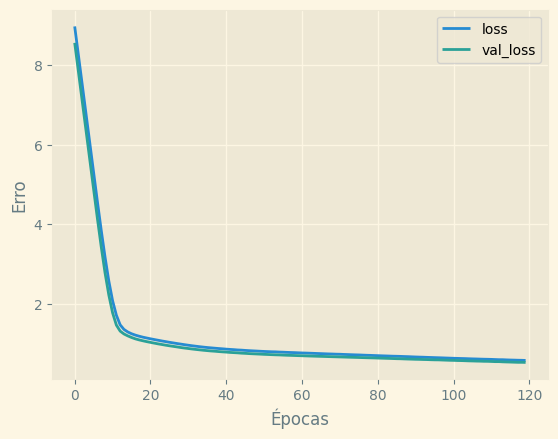

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5803
MAE:  0.5593194365501404
MSE:  0.7231552789561424
R2:  -3.892994750813042
Média de Entrada: 179506.4200913242
Média Prevista: 231188.14


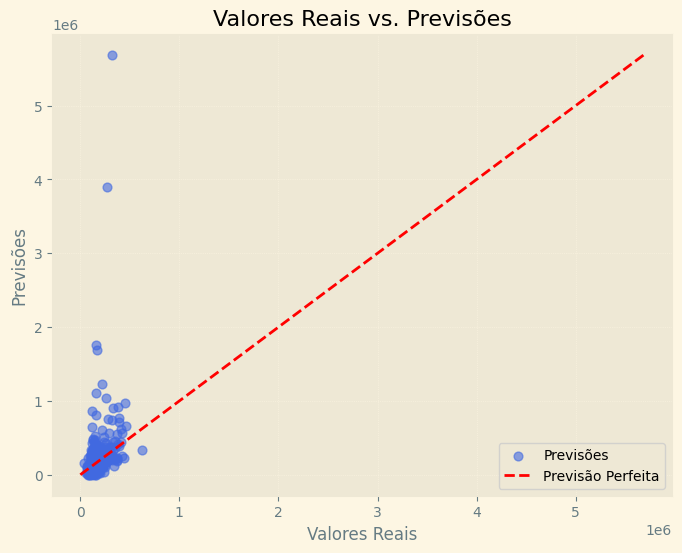

In [64]:
plot_loss(history_linear)

# Avalie o modelo
y_pred = linear.predict(X_test)
print("MAE: " , linear.evaluate(x=X_test, y=y_test))
print("MSE: " , mean_squared_error(y_pred=y_pred, y_true=y_test))
print("R2: " , r2_score(y_pred=y_pred, y_true=y_test))

y_pred = y_pred.flatten()
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

print('Média de Entrada:', y_test_original.mean())
print('Média Prevista:', y_pred_original.mean())

plot_real_vs_predicdt(y_test_original, y_pred_original)

### DECISION TREE

In [65]:
y_pred = tree.predict(X_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 0.14283638460048895
MSE: 0.03973724748525376
R2: 0.731130852508238


### NEURAL NETWORK

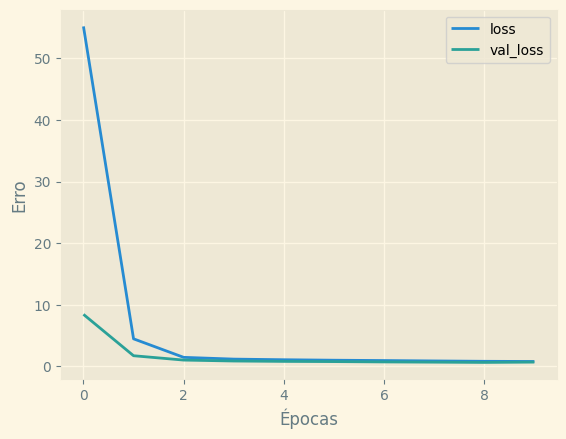

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE:  0.2770360393098171
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7910 
MSE:  0.7795719504356384
R2:  -0.4039107102960424
Média de Entrada: 179506.4200913242
Média Prevista: 199012.94


In [66]:
plot_loss(history_nn)

y_pred = model.predict(X_test)
print("MAE: " , mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("MSE: " , nn.evaluate(x=X_test, y=y_test))
print("R2: " , r2_score(y_pred=y_pred, y_true=y_test))

y_pred = y_pred.flatten()
# Reverter a transformação logarítmica para escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

print('Média de Entrada:', y_test_original.mean())
print('Média Prevista:', y_pred_original.mean())